In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/MarketingCampaignData.csv")
df.shape

(42600, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36.0,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
1,57.0,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
2,54.0,services,married,secondary,yes,0,yes,no,unknown,6,may,138,3,-1,0,unknown,no
3,51.0,blue-collar,married,secondary,no,50,yes,yes,unknown,6,may,121,1,-1,0,unknown,no
4,49.0,technician,married,unknown,no,15,no,no,unknown,6,may,92,2,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42600 entries, 0 to 42599
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        39944 non-null  float64
 1   job        41191 non-null  object 
 2   marital    41262 non-null  object 
 3   education  41940 non-null  object 
 4   default    42600 non-null  object 
 5   balance    42600 non-null  int64  
 6   housing    42600 non-null  object 
 7   loan       40004 non-null  object 
 8   contact    42600 non-null  object 
 9   day        42600 non-null  int64  
 10  month      42600 non-null  object 
 11  duration   42600 non-null  int64  
 12  campaign   42600 non-null  int64  
 13  pdays      42600 non-null  int64  
 14  previous   42600 non-null  int64  
 15  poutcome   42600 non-null  object 
 16  y          42600 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.5+ MB


In [ ]:
# null values
df.isnull().sum().sort_values(ascending=False)

age          2656
loan         2596
job          1409
marital      1338
education     660
duration        0
poutcome        0
previous        0
pdays           0
campaign        0
contact         0
month           0
day             0
housing         0
balance         0
default         0
y               0
dtype: int64

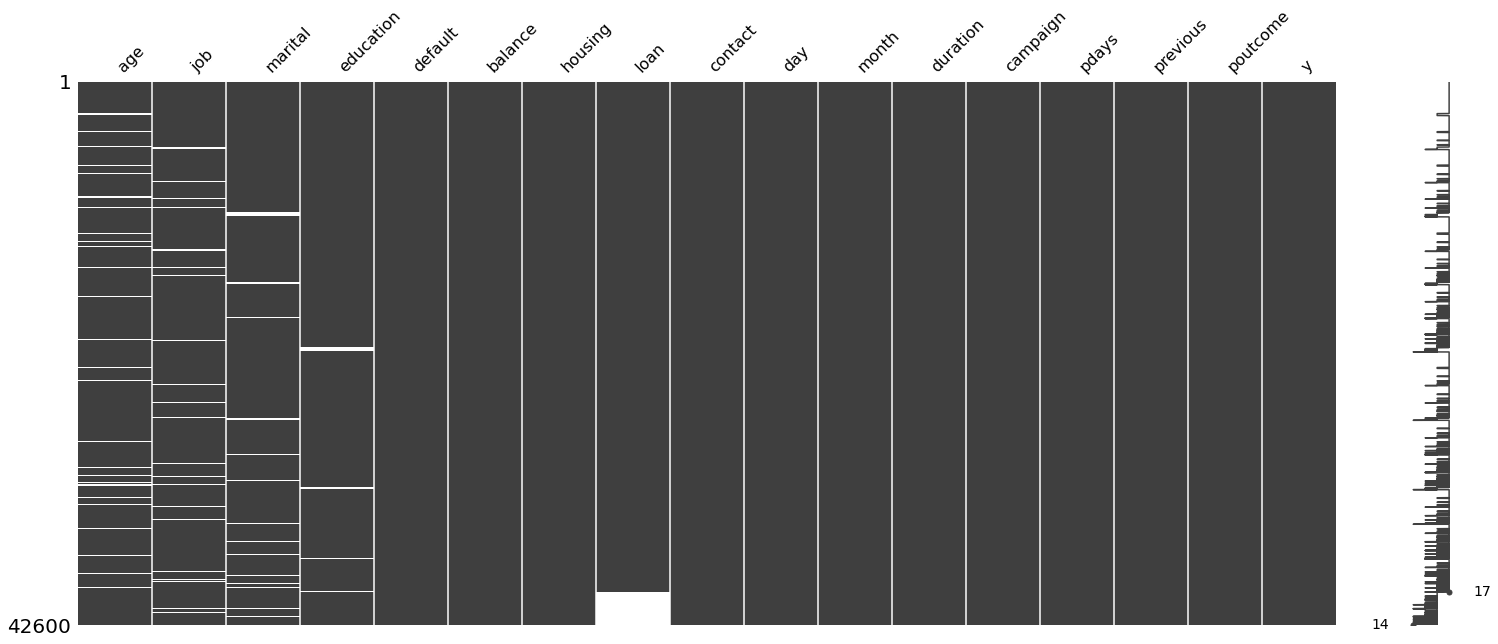

In [ ]:
#Visualizing null
import missingno as msno

msno.matrix(df)

In [ ]:
# Imputing with MICE
# Imputing missing data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['age'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

df=df.drop(['age'],axis=1)

df.insert(loc=0,
          column='age',
          value=list(df_mice_imputed['age']))

df = df.fillna("Unknown")

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000
mean,40.725015,1329.301643,15.899577,256.533310,2.820446,36.218756,0.505211
std,9.840696,2999.014702,8.311302,257.911496,3.165378,95.867208,2.251405
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,65.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,40.000000,432.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,47.000000,1384.250000,21.000000,317.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,850.000000,275.000000


In [ ]:
# null values
df.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

[Text(0.5, 1.0, 'Class&Age')]

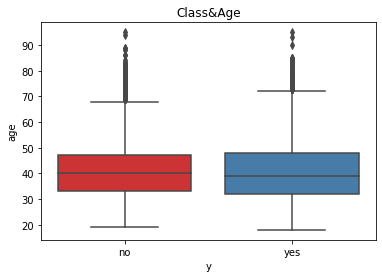

In [ ]:
#EDA
import seaborn as sns
sns.boxplot(x='y',y='age',data=df,palette='Set1').set(title='Class&Age') #Age might not affect classification

[Text(0.5, 1.0, 'Class&Day')]

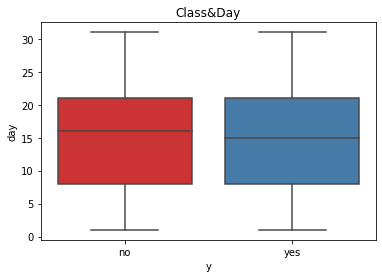

In [ ]:
sns.boxplot(x='y',y='day',data=df,palette='Set1').set(title='Class&Day')

[Text(0.5, 1.0, 'Class&Duration')]

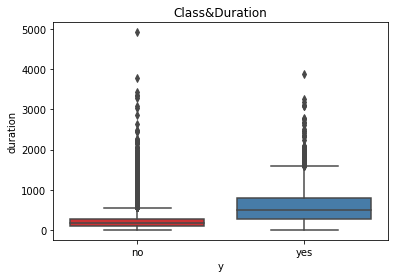

In [ ]:
sns.boxplot(x='y',y='duration',data=df,palette='Set1').set(title='Class&Duration')

[Text(0.5, 1.0, 'Class distribution')]

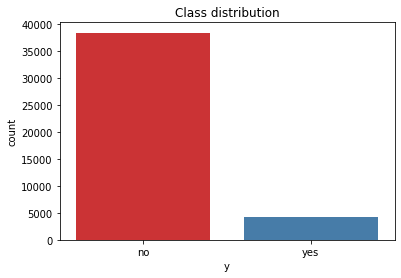

In [ ]:
sns.countplot(x='y',data=df,palette='Set1').set(title='Class distribution') #Class imbalance

[Text(0.5, 1.0, 'Class&Housing')]

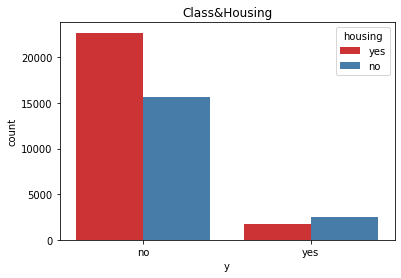

In [ ]:
sns.countplot(x='y',hue='housing',data=df,palette='Set1').set(title='Class&Housing')

In [ ]:
job = pd.get_dummies(df['job'],drop_first = True)
marital = pd.get_dummies(df['marital'],drop_first = True)
education = pd.get_dummies(df['education'],drop_first = True)
housing = pd.get_dummies(df['housing'],drop_first = True)
loan = pd.get_dummies(df['loan'],drop_first = True)
contact = pd.get_dummies(df['contact'],drop_first = True)
month = pd.get_dummies(df['month'],drop_first = True)
poutcome = pd.get_dummies(df['poutcome'],drop_first = True)

#df = df.drop(['default','job','marital','education','housing','loan','contact','month','poutcome'],axis=1,inplace=True)

df=pd.concat([df,job,marital,education,housing,loan,contact,month,poutcome],axis=1)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,36.000000,management,married,tertiary,no,101,yes,yes,unknown,5,...,0,0,0,1,0,0,0,0,0,1
1,57.000000,technician,married,unknown,no,206,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
2,54.000000,services,married,secondary,yes,0,yes,no,unknown,6,...,0,0,0,1,0,0,0,0,0,1
3,51.000000,blue-collar,married,secondary,no,50,yes,yes,unknown,6,...,0,0,0,1,0,0,0,0,0,1
4,49.000000,technician,married,unknown,no,15,no,no,unknown,6,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,28.000000,unemployed,single,Unknown,no,0,no,Unknown,cellular,6,...,0,0,0,0,0,0,0,0,0,1
42596,40.725015,blue-collar,married,Unknown,no,175,yes,Unknown,cellular,4,...,0,0,0,0,0,0,0,1,0,0
42597,40.725015,blue-collar,married,Unknown,no,4,yes,Unknown,cellular,8,...,1,0,0,0,0,0,0,0,0,1
42598,43.000000,management,married,Unknown,no,704,no,Unknown,cellular,18,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(['default','job','marital','education','housing','loan','contact','month','poutcome'],axis=1,inplace=True)
print(df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'divorced', 'married', 'single', 'primary',
       'secondary', 'tertiary', 'unknown', 'yes', 'no', 'yes', 'telephone',
       'unknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'other', 'success', 'unknown'],
      dtype='object')


In [ ]:
df = df.drop(['unknown','yes','other'],axis = 1)
print(df.head())

    age  balance  day  duration  campaign  pdays  previous   y  admin.  \
0  36.0      101    5       426         1     -1         0  no       0   
1  57.0      206    5       216         3     -1         0  no       0   
2  54.0        0    6       138         3     -1         0  no       0   
3  51.0       50    6       121         1     -1         0  no       0   
4  49.0       15    6        92         2     -1         0  no       0   

   blue-collar  ...  feb  jan  jul  jun  mar  may  nov  oct  sep  success  
0            0  ...    0    0    0    0    0    1    0    0    0        0  
1            0  ...    0    0    0    0    0    1    0    0    0        0  
2            0  ...    0    0    0    0    0    1    0    0    0        0  
3            1  ...    0    0    0    0    0    1    0    0    0        0  
4            0  ...    0    0    0    0    0    1    0    0    0        0  

[5 rows x 39 columns]


In [ ]:
# null values
df.isnull().sum().sort_values(ascending=False)

age              0
feb              0
primary          0
secondary        0
tertiary         0
no               0
telephone        0
aug              0
dec              0
jan              0
married          0
jul              0
jun              0
mar              0
may              0
nov              0
oct              0
sep              0
single           0
divorced         0
balance          0
blue-collar      0
day              0
duration         0
campaign         0
pdays            0
previous         0
y                0
admin.           0
entrepreneur     0
unemployed       0
housemaid        0
management       0
retired          0
self-employed    0
services         0
student          0
technician       0
success          0
dtype: int64

In [ ]:
import numpy as np
'''Outlier Detection '''
# IQR
# balance is taken because it has highest variance
Q1 = np.percentile(df['balance'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['balance'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (42600, 39)
New Shape:  (38096, 39)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# null values
df.isnull().sum().sort_values(ascending=False)

age              0
feb              0
primary          0
secondary        0
tertiary         0
no               0
telephone        0
aug              0
dec              0
jan              0
married          0
jul              0
jun              0
mar              0
may              0
nov              0
oct              0
sep              0
single           0
divorced         0
balance          0
blue-collar      0
day              0
duration         0
campaign         0
pdays            0
previous         0
y                0
admin.           0
entrepreneur     0
unemployed       0
housemaid        0
management       0
retired          0
self-employed    0
services         0
student          0
technician       0
success          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38096 entries, 0 to 42599
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            38096 non-null  float64
 1   balance        38096 non-null  int64  
 2   day            38096 non-null  int64  
 3   duration       38096 non-null  int64  
 4   campaign       38096 non-null  int64  
 5   pdays          38096 non-null  int64  
 6   previous       38096 non-null  int64  
 7   y              38096 non-null  object 
 8   admin.         38096 non-null  uint8  
 9   blue-collar    38096 non-null  uint8  
 10  entrepreneur   38096 non-null  uint8  
 11  housemaid      38096 non-null  uint8  
 12  management     38096 non-null  uint8  
 13  retired        38096 non-null  uint8  
 14  self-employed  38096 non-null  uint8  
 15  services       38096 non-null  uint8  
 16  student        38096 non-null  uint8  
 17  technician     38096 non-null  uint8  
 18  unempl

In [ ]:
set(list(df['y']))

{'no', 'yes'}

In [ ]:
labels = pd.DataFrame(df['y'])
labels.y[labels.y=='yes'] = 1
labels.y[labels.y=='no'] = 0
df = df.drop(['y'],axis=1)
df = df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38096 entries, 0 to 42599
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            38096 non-null  float64
 1   balance        38096 non-null  int64  
 2   day            38096 non-null  int64  
 3   duration       38096 non-null  int64  
 4   campaign       38096 non-null  int64  
 5   pdays          38096 non-null  int64  
 6   previous       38096 non-null  int64  
 7   admin.         38096 non-null  uint8  
 8   blue-collar    38096 non-null  uint8  
 9   entrepreneur   38096 non-null  uint8  
 10  housemaid      38096 non-null  uint8  
 11  management     38096 non-null  uint8  
 12  retired        38096 non-null  uint8  
 13  self-employed  38096 non-null  uint8  
 14  services       38096 non-null  uint8  
 15  student        38096 non-null  uint8  
 16  technician     38096 non-null  uint8  
 17  unemployed     38096 non-null  uint8  
 18  divorc

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df.values
y = np.array(labels)
print(X.shape)
print(y.shape)
X = scaler.fit_transform(X)
print(X.shape)

(38096, 38)
(38096, 1)
(38096, 38)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

print(f'''Shape of X before: {X.shape}
Shape of X after : {X_over.shape}''')

print('\nBalance of positive and negative classes (%):')
pd.DataFrame(y_over).value_counts(normalize=True) * 100

Shape of X before SMOTE: (38096, 38)
Shape of X after SMOTE: (69030, 38)

Balance of positive and negative classes (%):


0    50.0
1    50.0
dtype: float64

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=25).fit_transform(X_over, y_over)
X_new.shape

(69030, 25)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_over, test_size=0.25, random_state=42,stratify=y_over
)

Accuracy = 0.96
Recall = 1.00



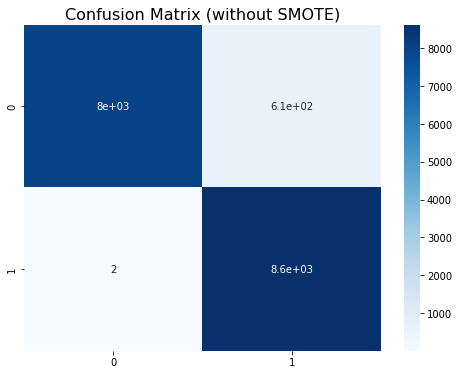

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');